In [1]:
# to access functions from root directory 
import sys
sys.path.append('/data/ad181/RemoteDir/rl_robust_owc')

In [2]:
%matplotlib notebook

import numpy as np
import pickle
import matplotlib.pyplot as plt

from utils.plot_functions import plot_s_snapshots
from utils.env_evaluate_functions import eval_actions

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
seed=1
case = 'case_2'
opt_dir = './'+case

with open('../envs_params/env_data/env_list_eval.pkl', 'rb') as input:
    envs = pickle.load(input)
rl_indices = list(range(16))

<IPython.core.display.Javascript object>


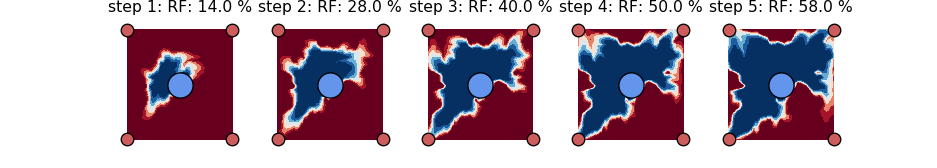

<IPython.core.display.Javascript object>


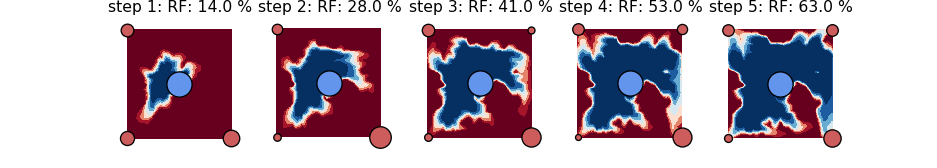

base: 0.5799109542127601
optimum: 0.6314399445463859
% improvement: 8


<IPython.core.display.Javascript object>


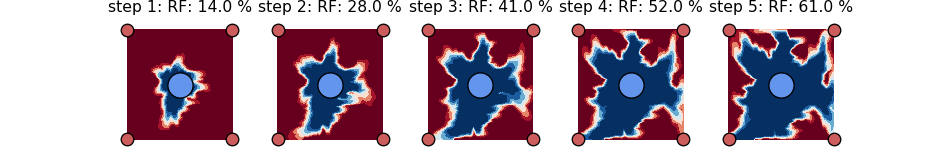

<IPython.core.display.Javascript object>


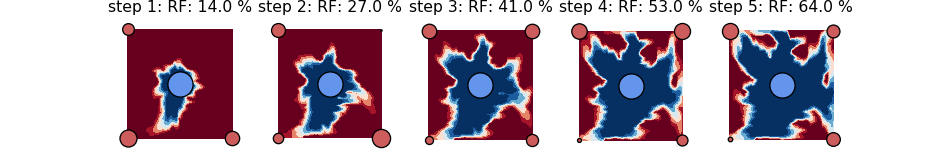

base: 0.611094392264835
optimum: 0.6363358092834457
% improvement: 4


<IPython.core.display.Javascript object>


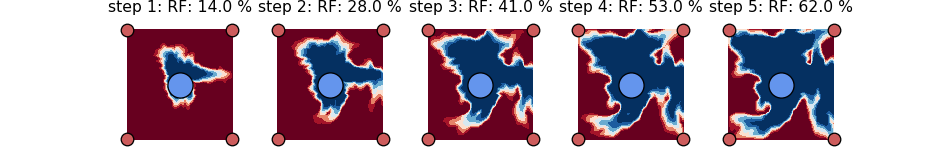

<IPython.core.display.Javascript object>


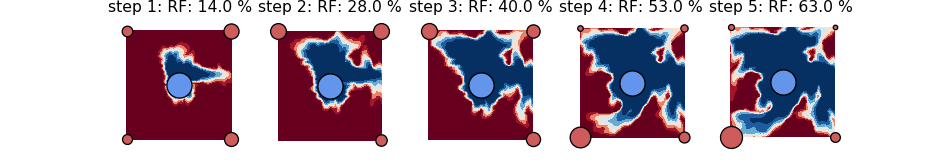

base: 0.616896105844247
optimum: 0.6322112970321868
% improvement: 2


<IPython.core.display.Javascript object>


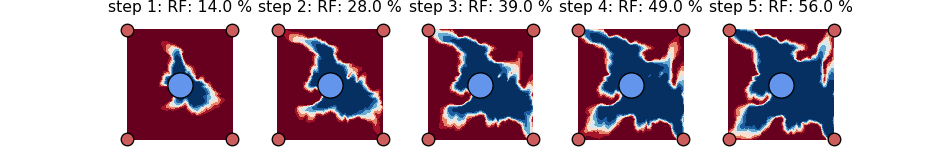

<IPython.core.display.Javascript object>


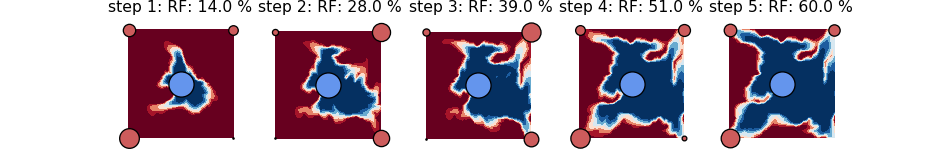

base: 0.5628119951569217
optimum: 0.5952369747010774
% improvement: 5


<IPython.core.display.Javascript object>


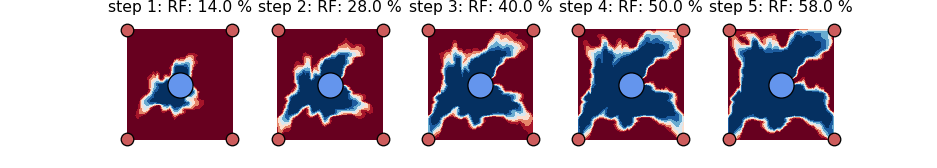

<IPython.core.display.Javascript object>


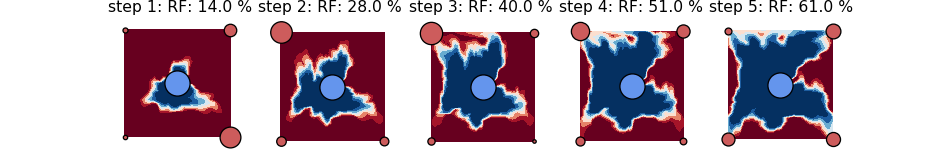

base: 0.5774382304511705
optimum: 0.6080828954784633
% improvement: 5


<IPython.core.display.Javascript object>


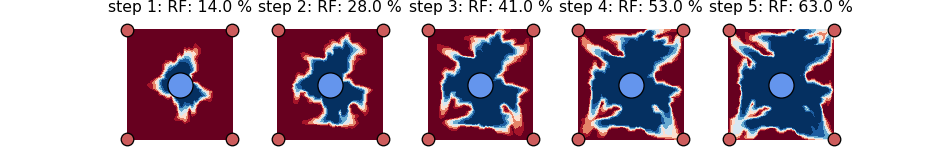

<IPython.core.display.Javascript object>


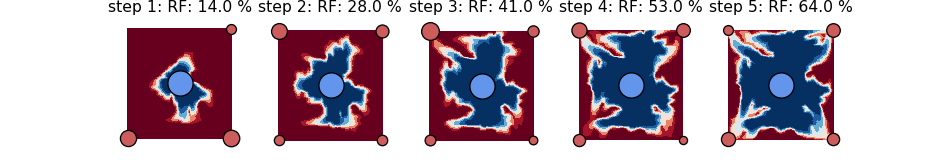

base: 0.6257760167418187
optimum: 0.6351892686791516
% improvement: 1


<IPython.core.display.Javascript object>


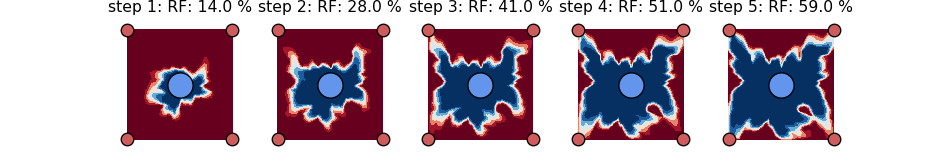

<IPython.core.display.Javascript object>


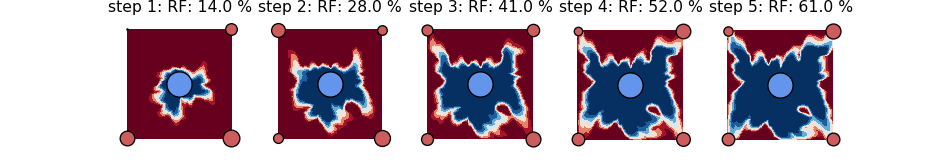

base: 0.5941570081845792
optimum: 0.6074513095831893
% improvement: 2


<IPython.core.display.Javascript object>


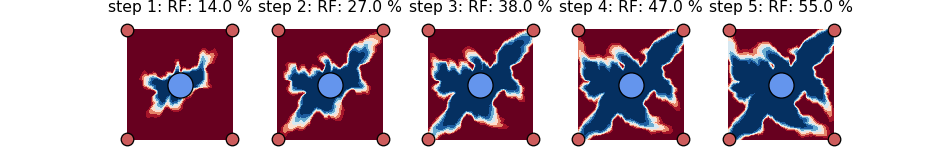

<IPython.core.display.Javascript object>


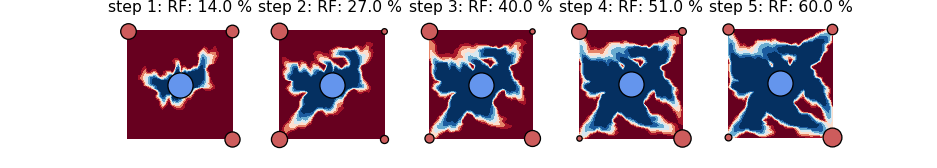

base: 0.5469263719518164
optimum: 0.5958794931160448
% improvement: 8


<IPython.core.display.Javascript object>


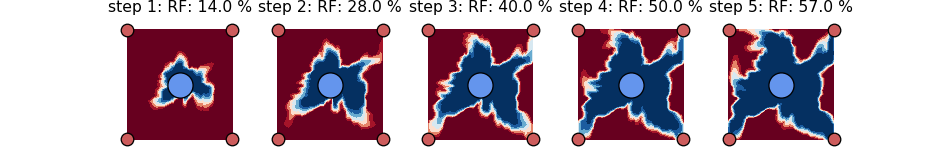

<IPython.core.display.Javascript object>


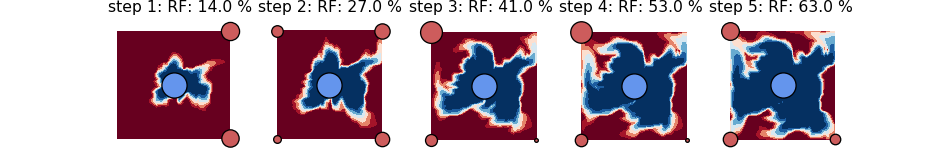

base: 0.5731553799867039
optimum: 0.6336230607037938
% improvement: 10


<IPython.core.display.Javascript object>


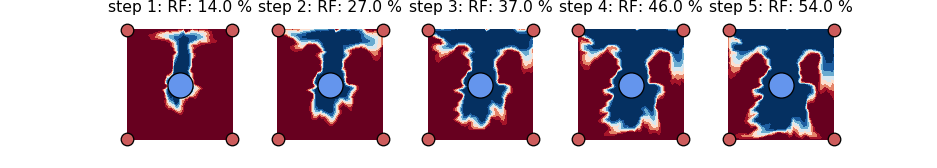

<IPython.core.display.Javascript object>


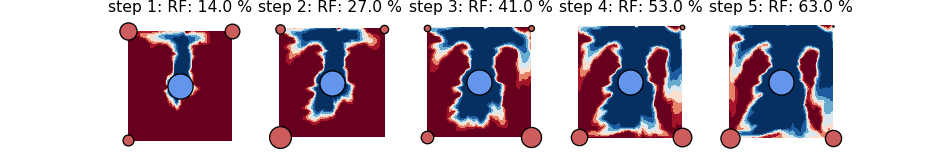

base: 0.5406171061150349
optimum: 0.6322067482333107
% improvement: 16


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/plot_functions.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,ctrl_steps,figsize=(round(figsize_scale*aspect)*ctrl_steps,figsize_scale) )


<IPython.core.display.Javascript object>


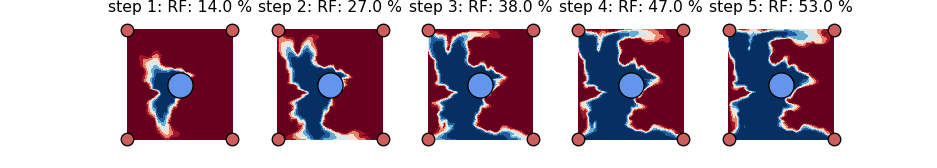

<IPython.core.display.Javascript object>


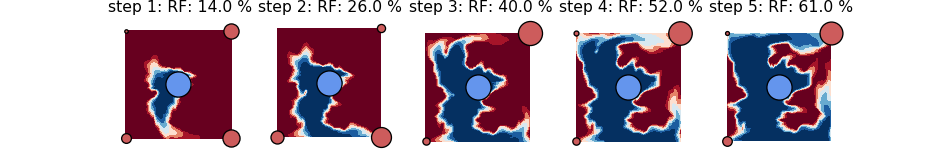

base: 0.5299412298968349
optimum: 0.6093406028664862
% improvement: 14


<IPython.core.display.Javascript object>


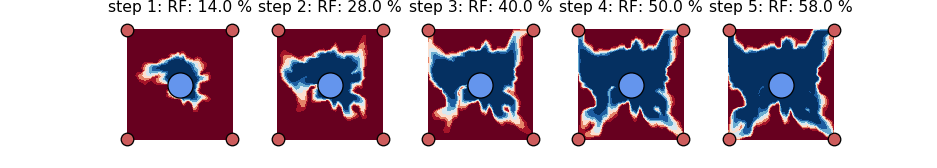

<IPython.core.display.Javascript object>


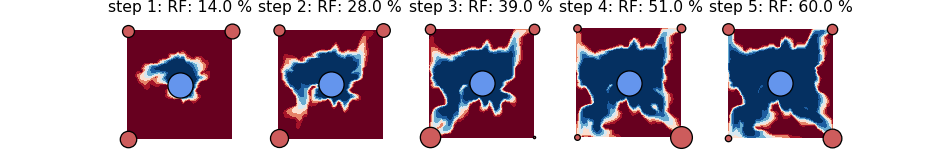

base: 0.5805290190911252
optimum: 0.5960783507340669
% improvement: 2


<IPython.core.display.Javascript object>


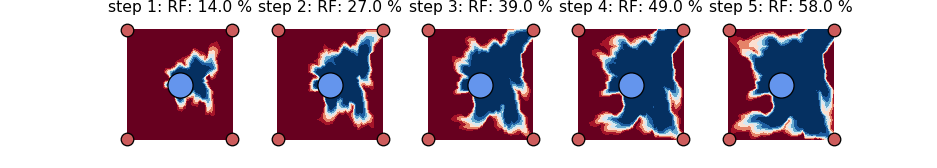

<IPython.core.display.Javascript object>


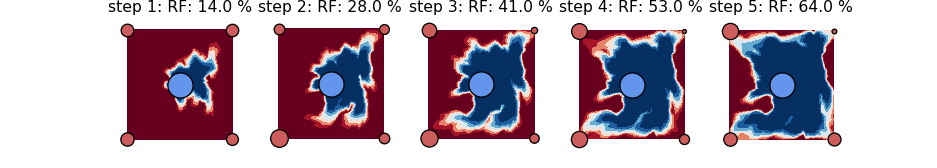

base: 0.5758009858821522
optimum: 0.6352896916346928
% improvement: 10


<IPython.core.display.Javascript object>


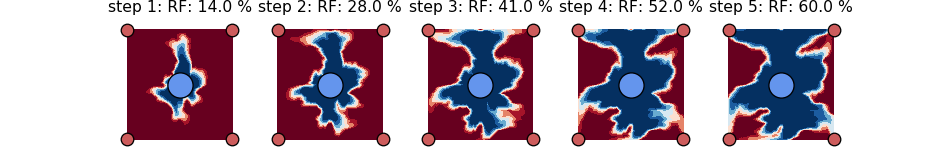

<IPython.core.display.Javascript object>


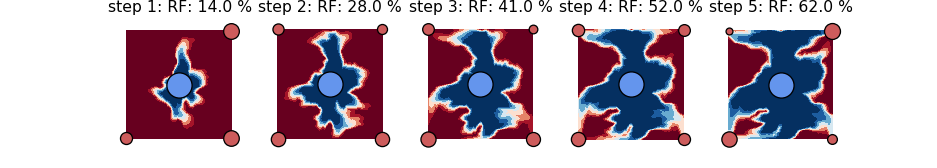

base: 0.6039581392654707
optimum: 0.6160271735982726
% improvement: 1


<IPython.core.display.Javascript object>


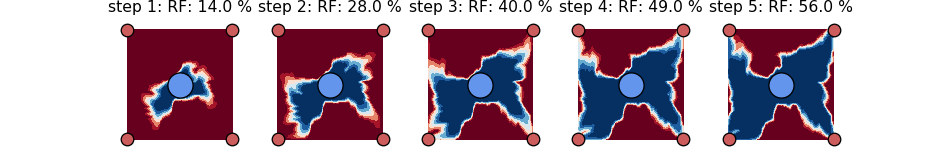

<IPython.core.display.Javascript object>


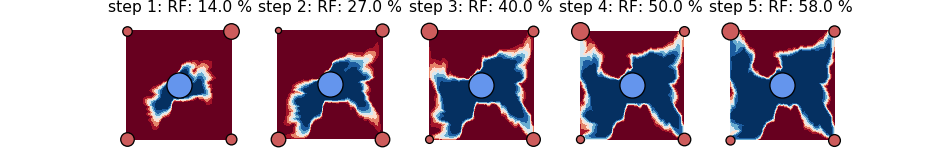

base: 0.5627127286448984
optimum: 0.5755375470951987
% improvement: 2


<IPython.core.display.Javascript object>


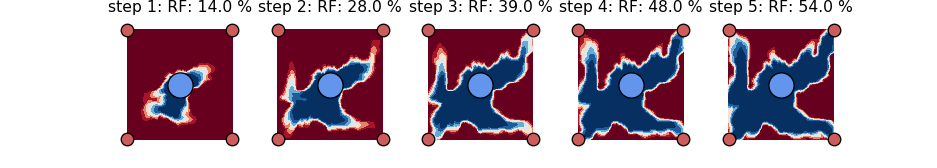

<IPython.core.display.Javascript object>


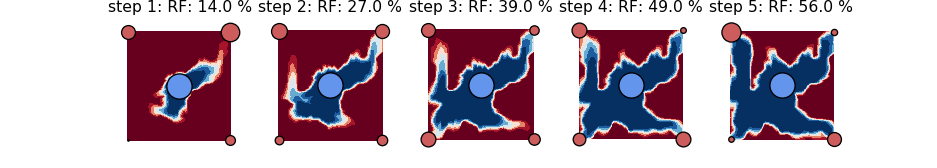

base: 0.5437876655142058
optimum: 0.5578732276162709
% improvement: 2


In [4]:
base_array, opt_array = [], []

for idx in rl_indices:
    
    env = envs[idx]
    
    base_action = np.ones((env.terminal_step, env.action_space.shape[0]))
    states, actions, rewards = eval_actions(env, base_action)
    fig = plot_s_snapshots(states, actions, rewards, 
                       s_max=0.8, s_min=0.2,
                       marker_size_ref=0.5, figsize_scale=1.8)
    base_reward = sum(rewards)

    opt_action = np.load(opt_dir+'/ck_argmax_'+str(idx)+'.npy').reshape(env.terminal_step, -1)
    states, actions, rewards = eval_actions(env, opt_action)
    fig = plot_s_snapshots(states, actions, rewards, 
                       s_max=0.8, s_min=0.2,
                       marker_size_ref=0.5, figsize_scale=1.8)
    opt_reward = sum(rewards)
    
    base_array.append(base_reward)
    opt_array.append(opt_reward)
    
    print(f'base: {base_reward}')
    print(f'optimum: {opt_reward}')
    print(f'% improvement: {int(100*np.abs(base_reward-opt_reward)/base_reward)}')  

/home/ad181/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


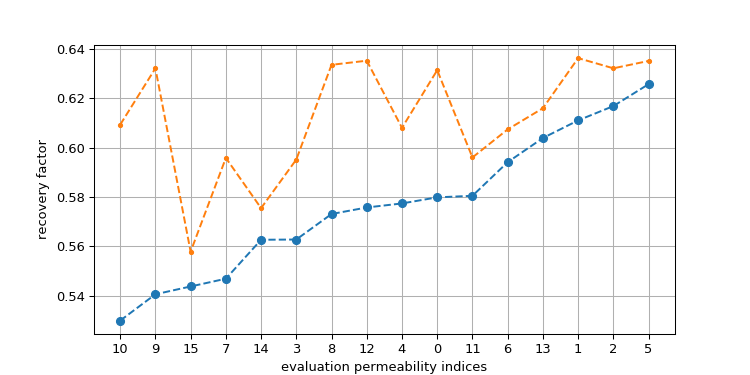

In [5]:
fig, axs = plt.subplots(1,1,figsize=(8,4) )

sort_indices = np.argsort(base_array)

axs.plot(np.array(base_array)[sort_indices], 'o--')
axs.plot(np.array(opt_array)[sort_indices], '.--')
axs.set_ylabel('recovery factor')
axs.set_xlabel('evaluation permeability indices')
axs.set_xticks(rl_indices)
axs.set_xticklabels(sort_indices)
axs.grid('on')
plt.show()

In [6]:
print(np.mean(base_array))
print(np.mean(opt_array))

0.5765945830752859
0.6123627121813773
